In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [3]:
data = pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
# Check for missing values
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
df.shape

(1436, 9)

In [8]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [9]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


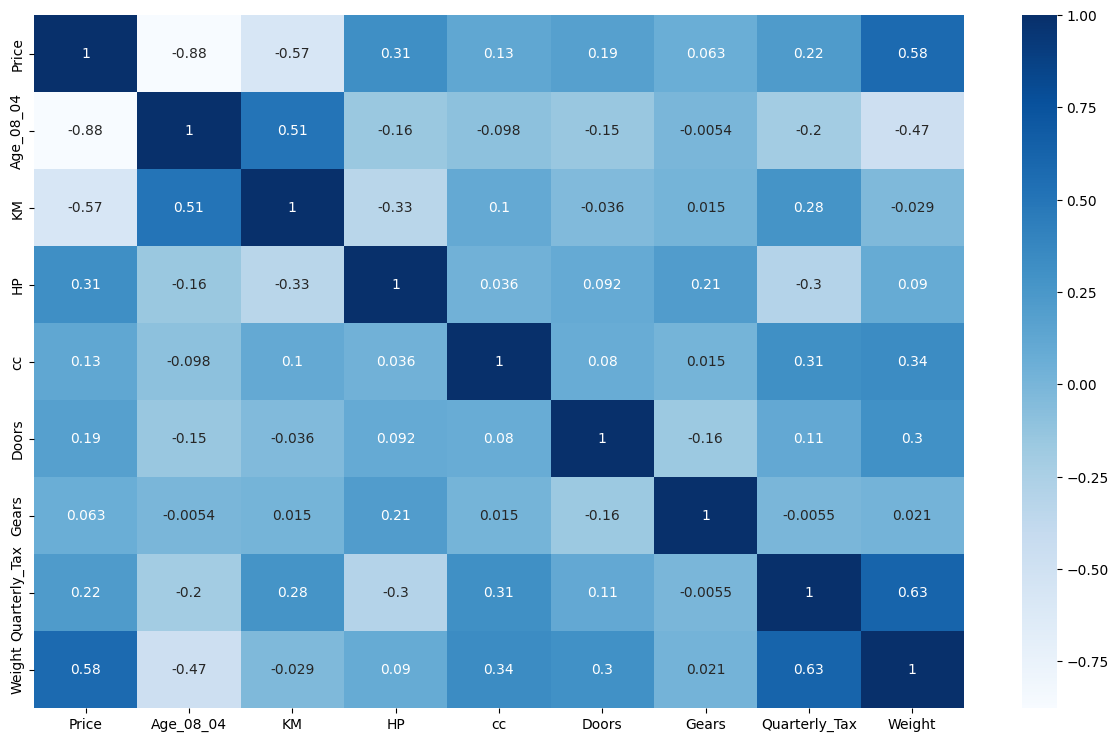

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix,annot=True,cmap='Blues')
plt.show()

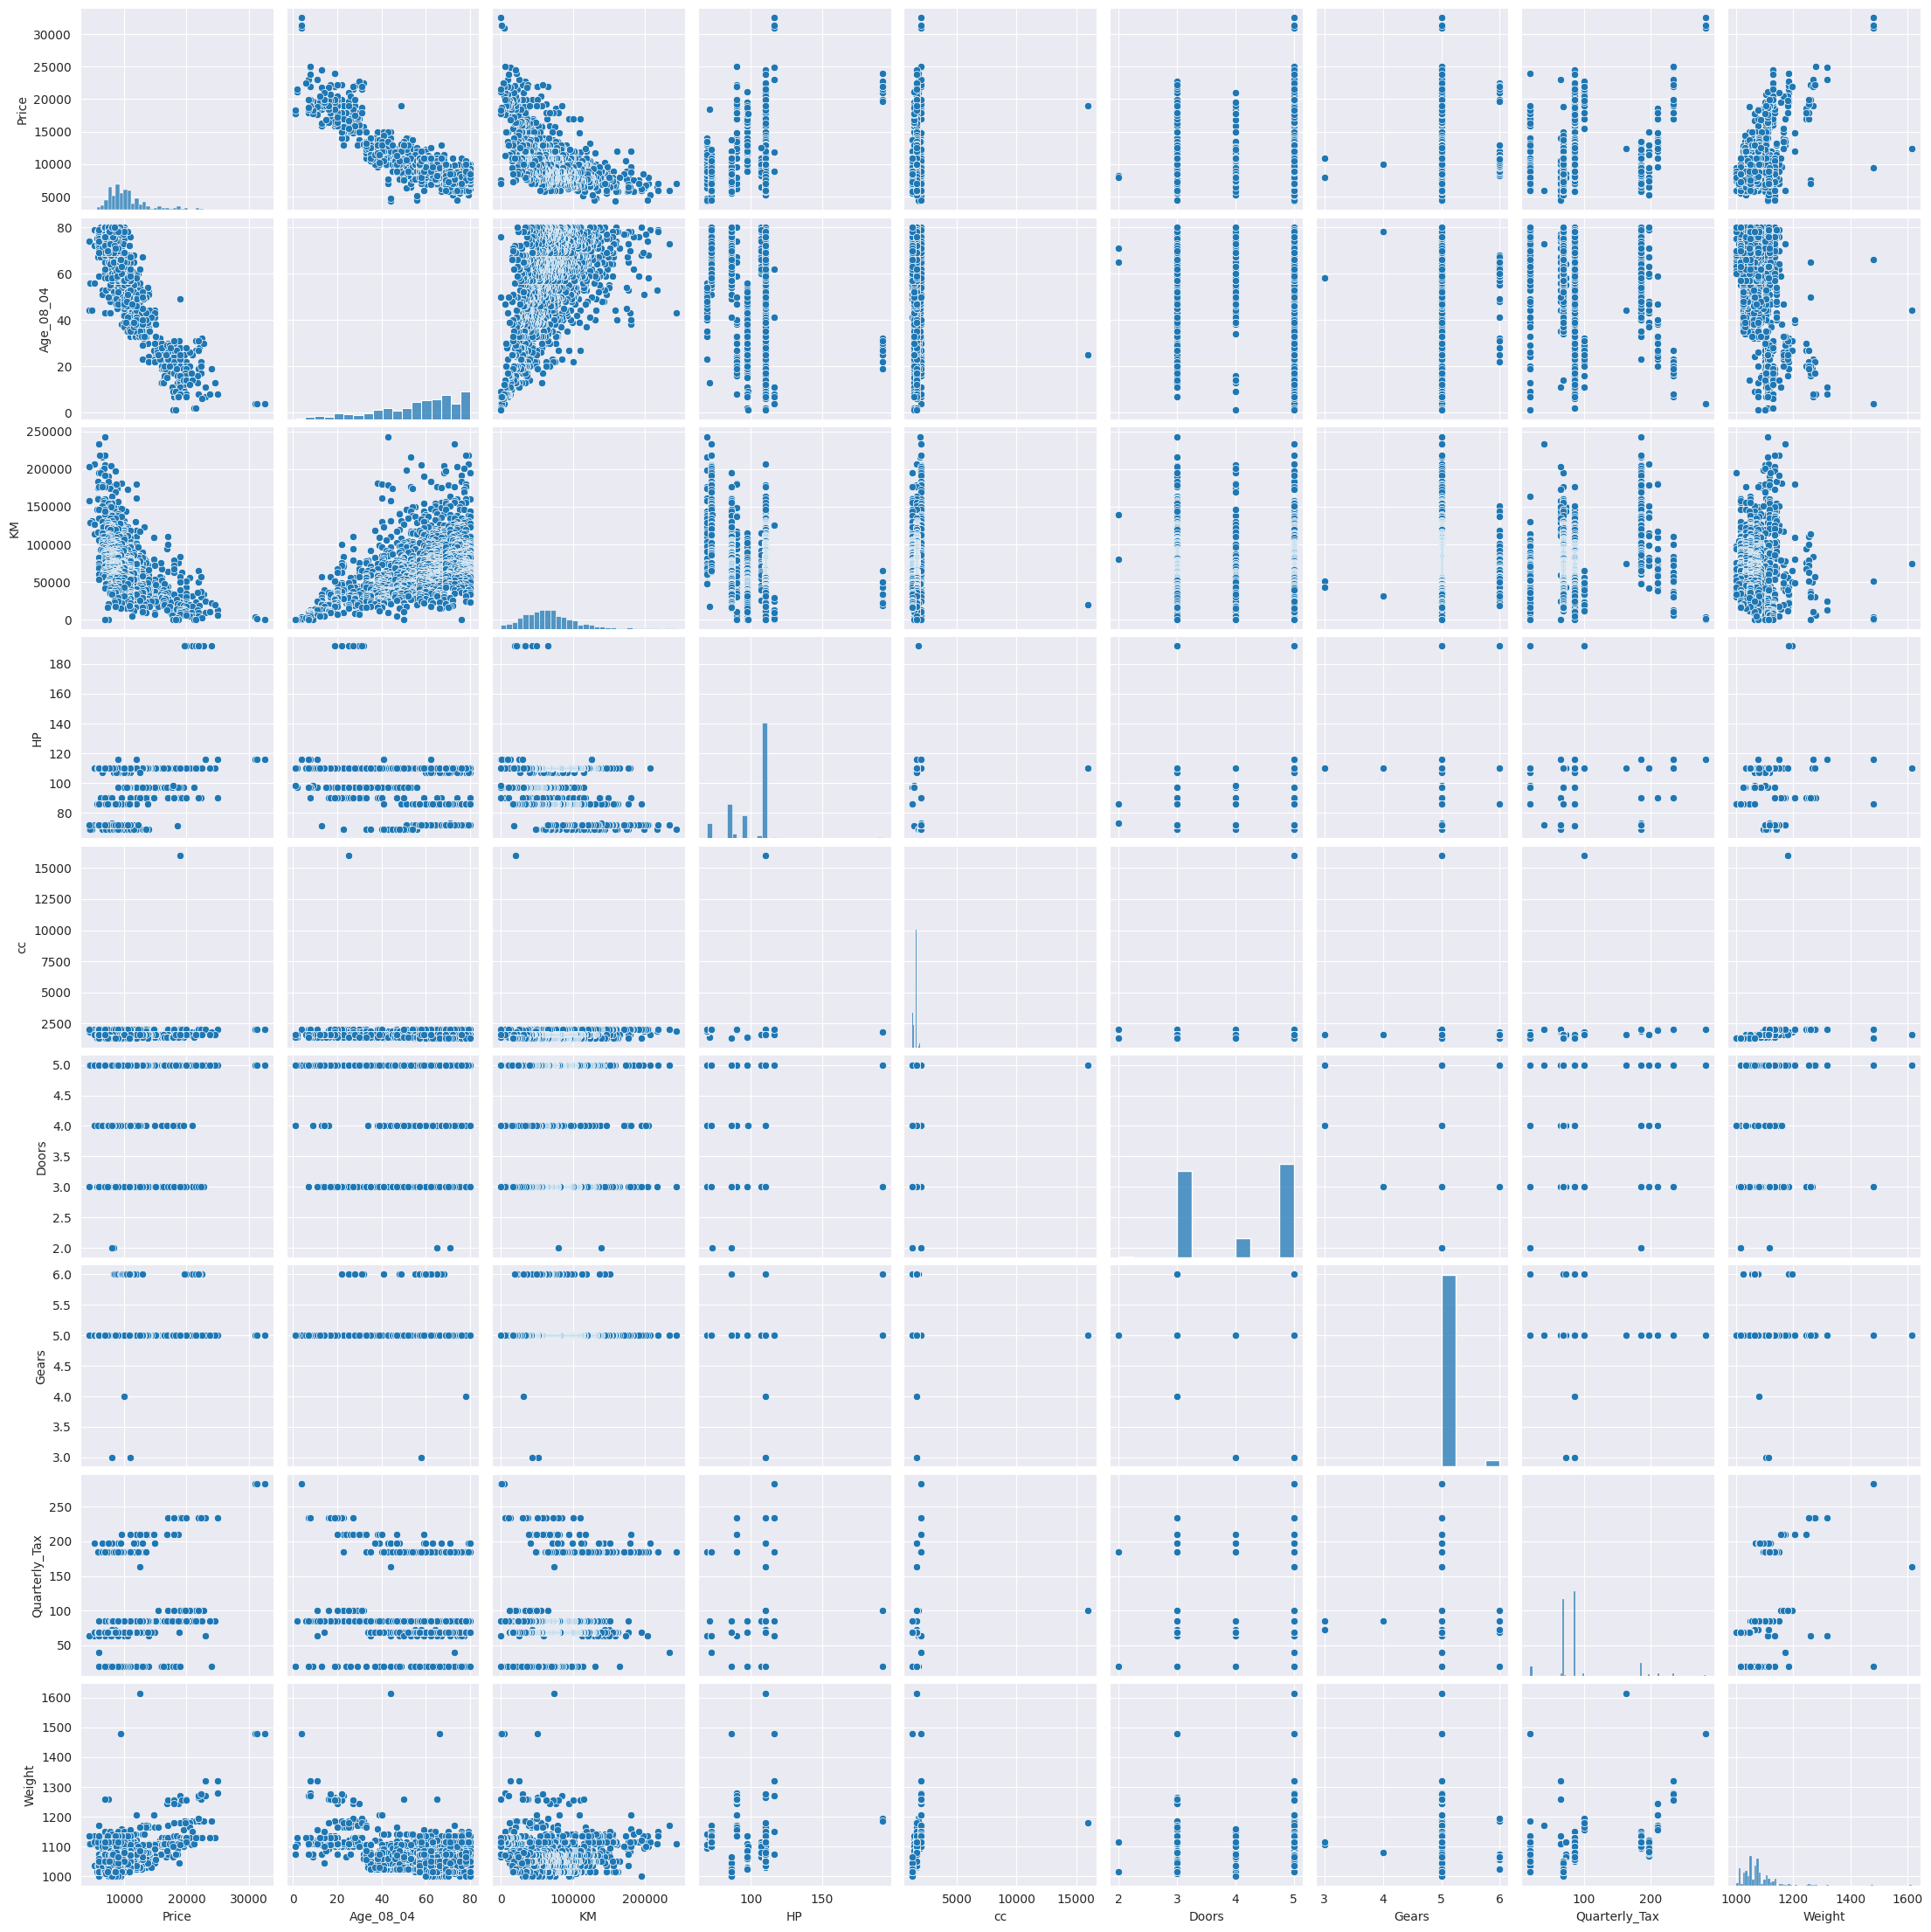

In [11]:
sns.set_style(style='darkgrid')     # for creating the grid
sns.pairplot(df)

In [12]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [13]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:55:34   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949

In [15]:
(model.rsquared, model.rsquared_adj,model.aic)

(0.8637627463428191, 0.8629989775766962, 24769.07664007625)

In [16]:
# t-values and p-values
print(model.tvalues,'\n\n',model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 

 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [17]:
df['Predicted_Price']=model.fittedvalues
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted_Price
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121


In [18]:
df['Error'] = model.resid
df['Error_Sq'] = (df.Error)**2
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted_Price,Error,Error_Sq
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505,1.097319e+07
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186,6.362276e+06
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460,8.126676e+06
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731,2.180043e+06
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010,6.112856e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297,1.673811e+06
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579,6.521187e+06
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993,2.088672e+03
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121,1.763685e+06


In [19]:
df.Error_Sq.mean()

1790935.608390293

In [20]:
model_cc = smf.ols("Price~cc",data=df).fit()
print(model_cc.tvalues,'\n\n',model_cc.pvalues)
print('\n\n',model_cc.summary())

Intercept    24.694090
cc            4.824822
dtype: float64 

 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.55e-06
Time:                        12:55:53   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

In [21]:
model_doors = smf.ols("Price~Doors",data=df).fit()
print(model_doors.tvalues,'\n\n',model_doors.pvalues)
print('\n\n',model_doors.summary())

Intercept    19.258097
Doors         7.141657
dtype: float64 

 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.46e-12
Time:                        12:55:56   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

In [22]:
model_cc_doors = smf.ols("Price~cc+Doors",data=df).fit()
print(model_cc_doors.tvalues,'\n\n',model_cc_doors.pvalues)
print('\n\n',model_cc_doors.summary())

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 

 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.15e-15
Time:                        12:56:00   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    st

In [23]:
fit_vals = model.fittedvalues
res_vals = model.resid
df1 = pd.DataFrame({'fitted_Values':fit_vals,'residuals':res_vals})
df1

,fitted_Values,residuals
0,16812.580505,-3312.580505
1,16272.355186,-2522.355186
2,16800.732460,-2850.732460
3,16426.496731,-1476.496731
4,16222.419010,-2472.419010
...,...,...
1431,8793.758297,-1293.758297
1432,8291.338421,2553.661579
1433,8454.298007,45.701993
1434,8578.038121,-1328.038121


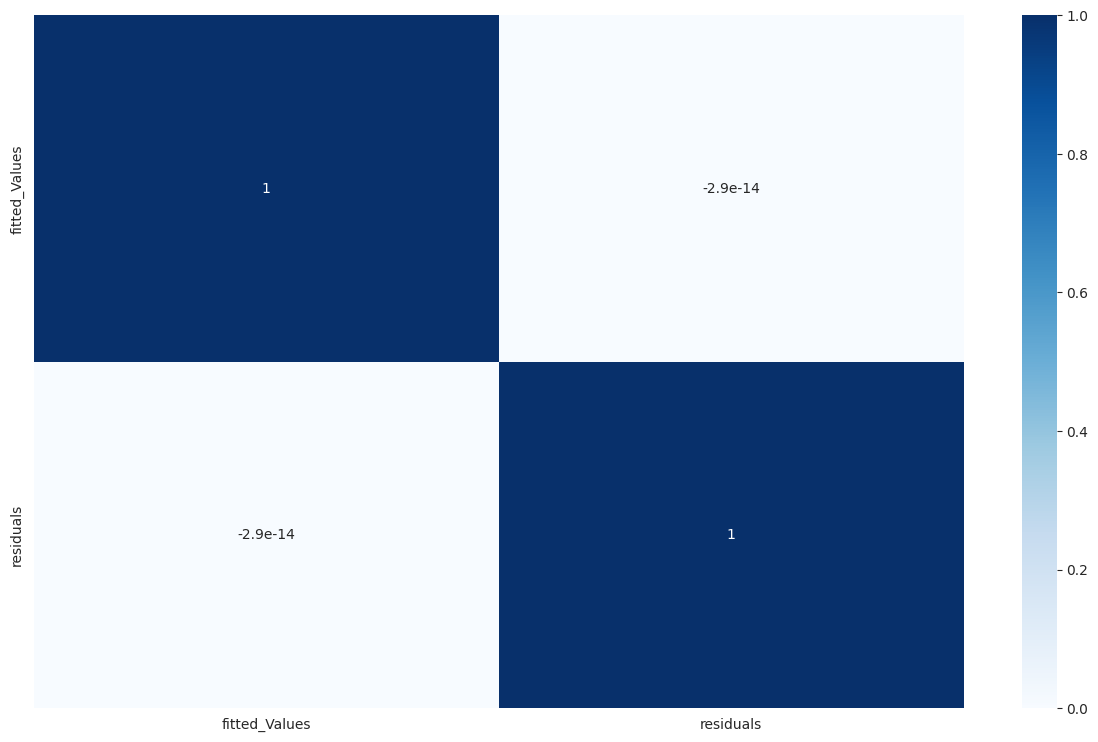

In [24]:
cor_mat = df1.corr()

plt.figure(figsize=(15,9))
sns.heatmap(cor_mat,annot=True,cmap='Blues')
plt.show()

In [25]:
print(df1.residuals.mean())
print(df1.residuals.median())

3.6572226002802007e-09
-21.343493243555713


<Axes: xlabel='residuals', ylabel='Density'>

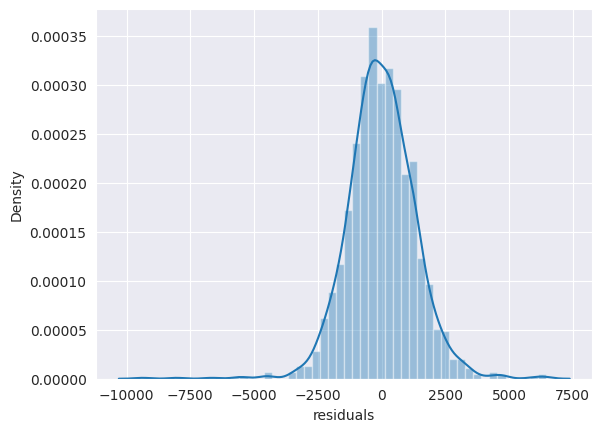

In [26]:
sns.distplot(df1.residuals)

Here we can see the residuals are normally distributed

<Axes: >

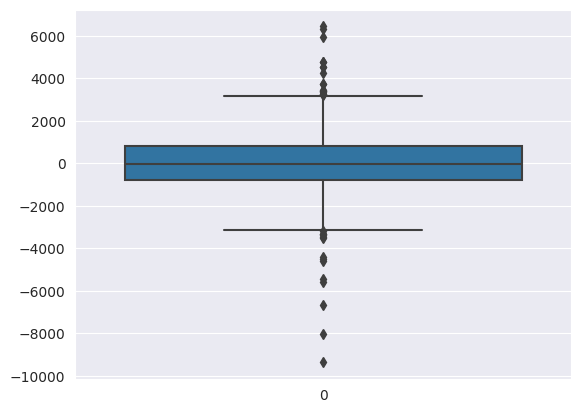

In [27]:
sns.boxplot(df1.residuals)

<Axes: xlabel='fitted_Values', ylabel='residuals'>

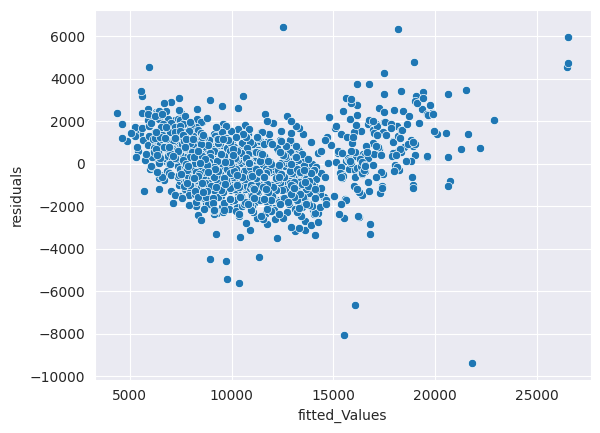

In [28]:
sns.scatterplot(x=df1.fitted_Values,y=df1.residuals,data=df1)

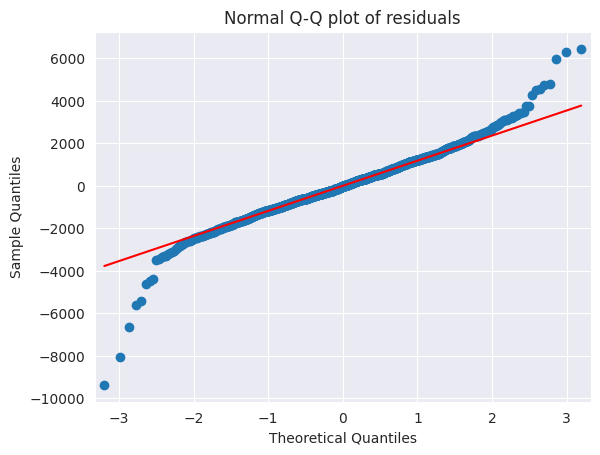

In [29]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [30]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

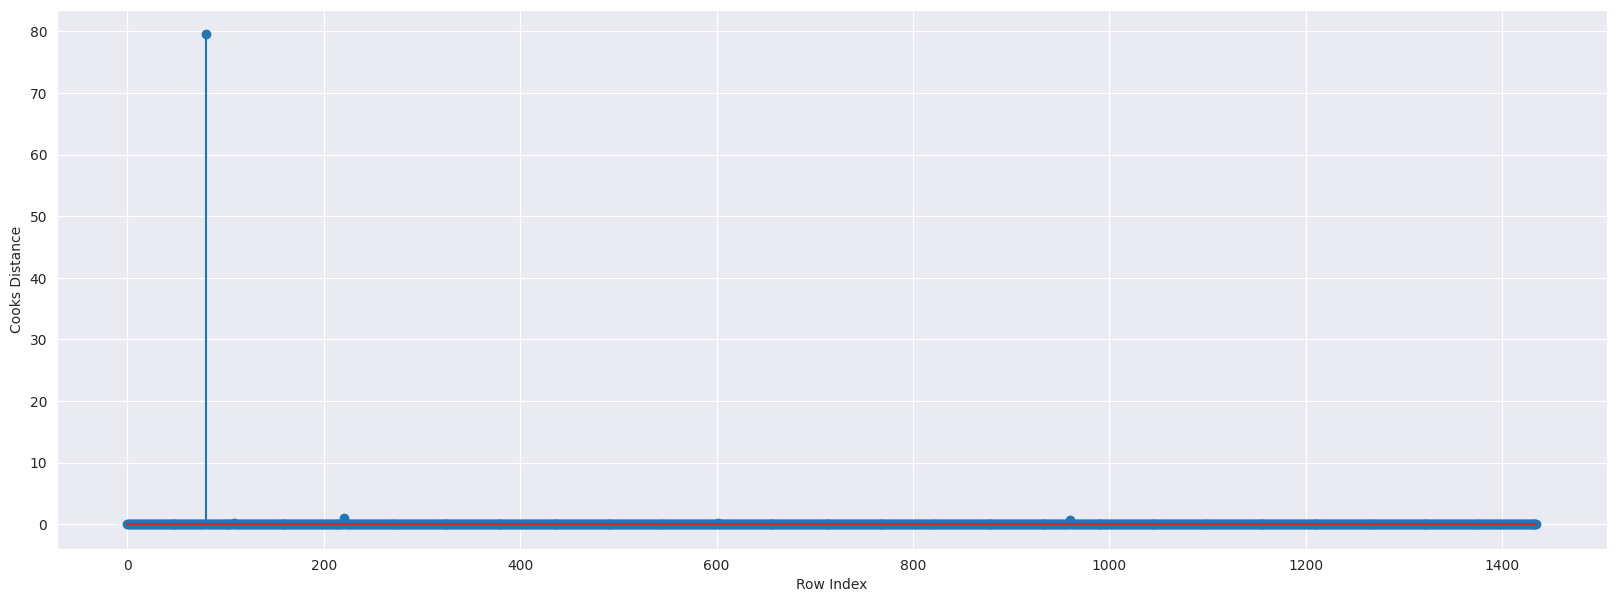

In [32]:
# Plot the influencers values using stem plot

plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624141815)

In [34]:
from statsmodels.graphics.regressionplots import influence_plot

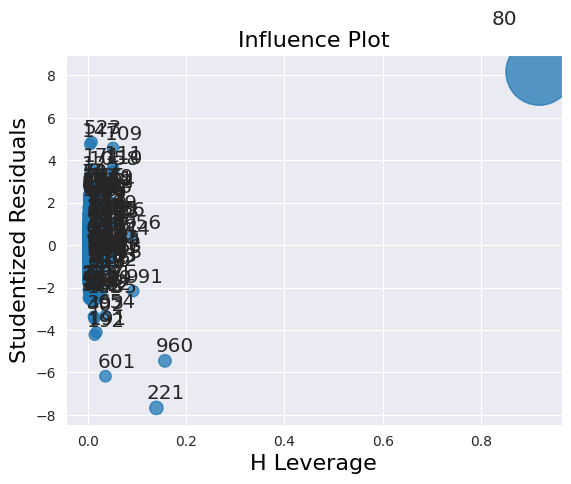

In [35]:
influence_plot(model)
plt.show()

In [36]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.027158774373259052

In [37]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~KM+HP+Age_08_04+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~KM+HP+cc+Age_08_04+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~KM+HP+cc+Doors+Age_08_04+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qtax = smf.ols('Quarterly_Tax~KM+HP+cc+Doors+Gears+Age_08_04+Weight',data=df).fit().rsquared
vif_qtax = 1/(1-rsq_qtax)

rsq_wt = smf.ols('Weight~KM+HP+cc+Doors+Gears+Quarterly_Tax+Age_08_04',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)


vif_df = pd.DataFrame({'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qtax,vif_wt,]})
vif_df

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [38]:
df_log = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df_log

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [39]:
df_ = np.log(df_log)
df_

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,9.510445,3.135494,10.757605,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
1,9.528794,3.135494,11.197351,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
2,9.543235,3.178054,10.638520,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
3,9.612467,3.258097,10.778956,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
4,9.528794,3.401197,10.558414,4.499810,7.600902,1.098612,1.609438,5.347108,7.064759
...,...,...,...,...,...,...,...,...,...
1431,8.922658,4.234107,9.930324,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
1432,9.291459,4.276666,9.852194,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1433,9.047821,4.262680,9.741909,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1434,8.888757,4.248495,9.736015,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644


In [40]:
model_log = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_).fit()

In [41]:
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     552.5
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:57:53   Log-Likelihood:                 722.64
No. Observations:                1436   AIC:                            -1427.
Df Residuals:                    1427   BIC:                            -1380.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5032      0.845      4.146

In [42]:
(model_log.rsquared, model_log.rsquared_adj,model_log.aic)

(0.7559497241305375, 0.7545815375804634, -1427.283177529966)

In [43]:
df_sqrt = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df_sqrt

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [44]:
df_ = np.sqrt(df_sqrt)
df_

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,116.189500,4.795832,216.762543,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
1,117.260394,4.795832,270.068510,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
2,118.110118,4.898979,204.232710,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
3,122.270193,5.099020,219.089023,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
4,117.260394,5.477226,196.214169,9.486833,44.721360,1.732051,2.236068,14.491377,34.205263
...,...,...,...,...,...,...,...,...,...
1431,86.602540,8.306624,143.331783,9.273618,36.055513,1.732051,2.236068,8.306624,32.015621
1432,104.139330,8.485281,137.840488,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065
1433,92.195445,8.426150,130.445391,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065
1434,85.146932,8.366600,130.061524,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065


In [45]:
model_sqrt = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_).fit()

In [46]:
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1147.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:58:15   Log-Likelihood:                -4587.4
No. Observations:                1436   AIC:                             9193.
Df Residuals:                    1427   BIC:                             9240.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.7901     12.595     -0.460

In [47]:
(model_sqrt.rsquared, model_sqrt.rsquared_adj,model_sqrt.aic)

(0.8654403950553531, 0.8646860314677167, 9192.86182611075)

In [48]:
df_std = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [49]:
df__ = pd.DataFrame(columns=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
df__

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_tran = df_std[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
std_tran = sc.fit_transform(col_to_tran)


In [51]:
columns=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df_ = pd.DataFrame(std_tran,columns=columns)
df_

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [52]:
model_std = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_).fit()

In [53]:
y = df_.iloc[:,:1]
y

,Price
0,0.763763
1,0.832715
2,0.887877
3,1.163685
4,0.832715
...,...
1431,-0.891089
1432,0.031491
1433,-0.615281
1434,-0.960042


In [54]:
x = df_.iloc[:,1:]
x

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [55]:
print(model_std.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:58:46   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1231.
Df Residuals:                    1427   BIC:                             1278.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.109e-16      0.010   3.18e-14

In [56]:
(model_std.rsquared, model_std.rsquared_adj,model_std.aic)

(0.8637627463428191, 0.8629989775766962, 1230.7302395925517)

In [57]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [58]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
df.rename({'R&D Spend':'RnD_Spend', 'Marketing Spend':'Marketing_Spend'},axis=1,inplace=True)
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [61]:
df.isna().sum()

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [62]:
df.dtypes

RnD_Spend          float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [63]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [64]:
df.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


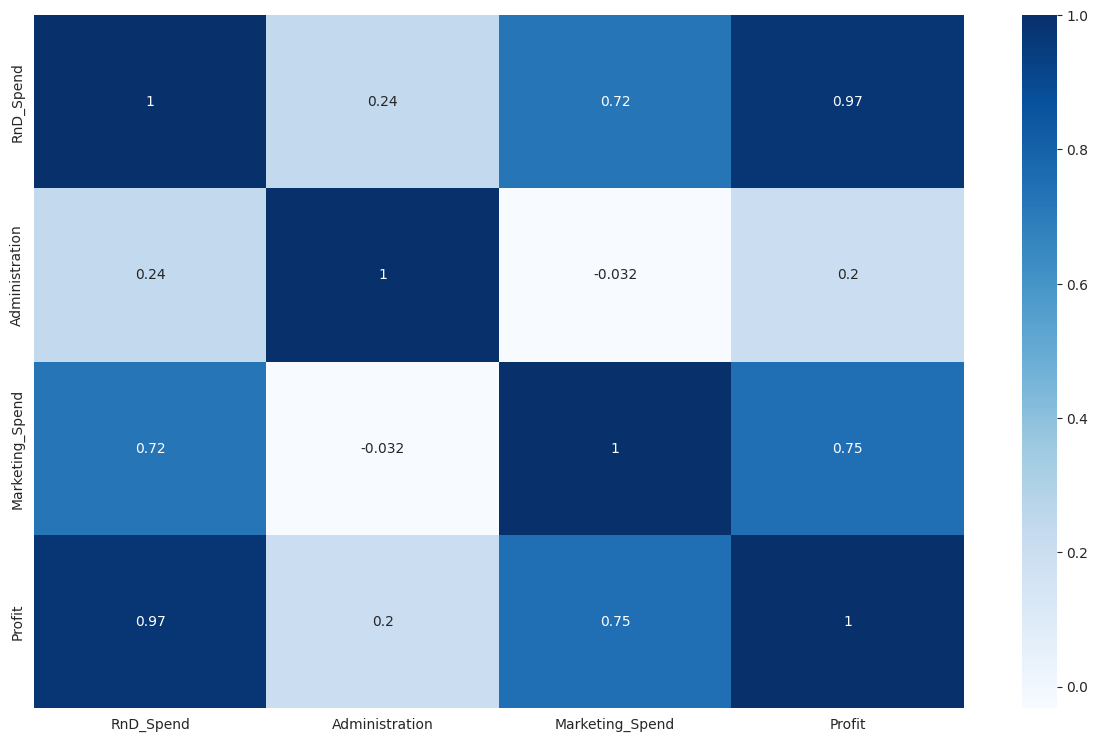

In [65]:
cor_mat = df.corr()

plt.figure(figsize=(15,9))
sns.heatmap(cor_mat,annot=True,cmap='Blues')
plt.show()

Here Marketing Spend and RnD Spend showing high correlation

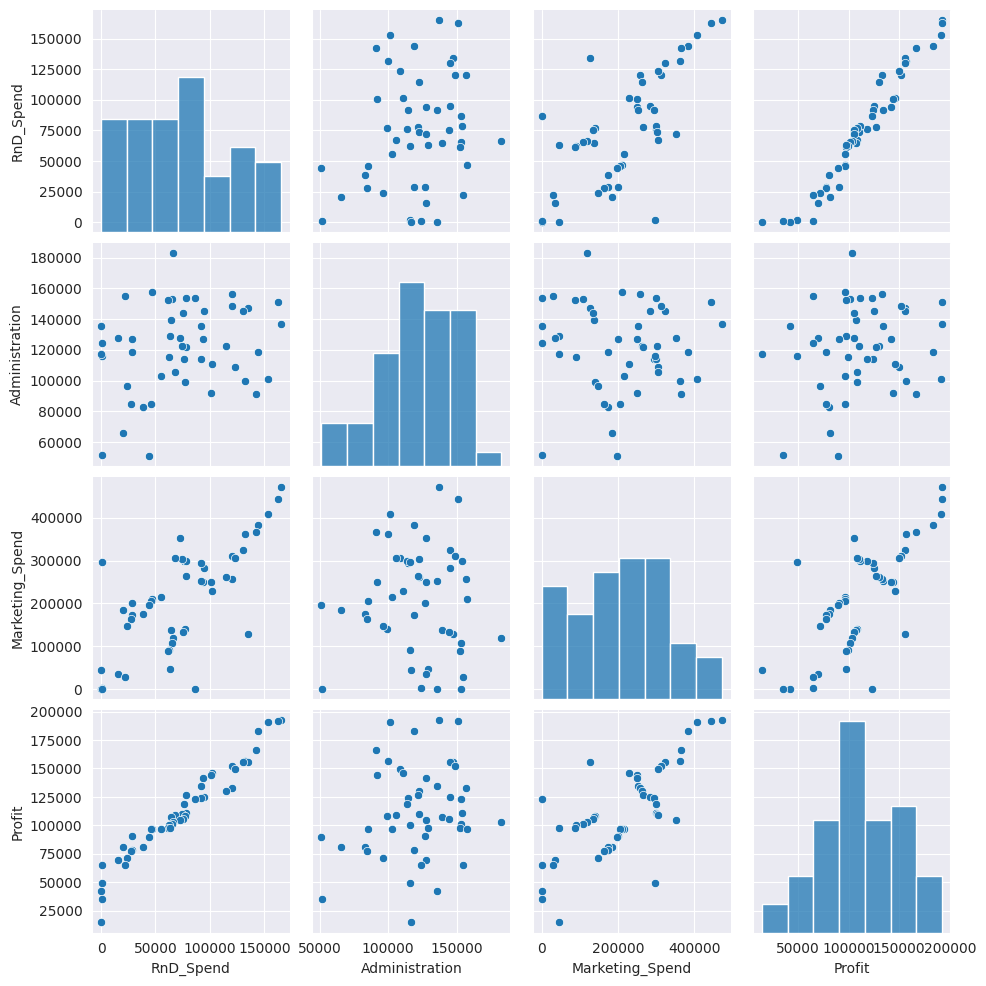

In [66]:
sns.set_style(style='darkgrid')     # for creating the grid
sns.pairplot(df)

In [67]:
model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=df).fit()

In [68]:
model.params

Intercept          50122.192990
RnD_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [69]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        13:00:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353     

In [70]:
model_rnd = smf.ols('Profit~RnD_Spend',data=df).fit()      # Only RnD
print(model_rnd.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           3.50e-32
Time:                        13:01:00   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.0

In [71]:
model_mar = smf.ols('Profit~Marketing_Spend',data=df).fit()         # Only Marketing_Spend
print(model_mar.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        13:01:03   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530     

In [72]:
model_adm_mar = smf.ols('Profit~Administration+Marketing_Spend',data=df).fit()         # Administration and Marketing Spend
print(model_adm_mar.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.50e-10
Time:                        13:01:06   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04     

In [73]:
model_adm = smf.ols('Profit~Administration',data=df).fit()      # Only Administration
print(model_adm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.162
Time:                        13:01:09   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.

In [74]:
df1 = df[['RnD_Spend','Marketing_Spend','State','Profit']]
df1.head()

,RnD_Spend,Marketing_Spend,State,Profit
0,165349.20,471784.10,New York,192261.83
1,162597.70,443898.53,California,191792.06
2,153441.51,407934.54,Florida,191050.39
3,144372.41,383199.62,New York,182901.99
4,142107.34,366168.42,Florida,166187.94


In [75]:
model1 = smf.ols('Profit~RnD_Spend+Marketing_Spend',data=df1).fit()

In [76]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.16e-31
Time:                        13:01:18   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     

In [77]:
df['Predicted_Price']=model.fittedvalues

In [78]:
df['Error'] = model.resid
df['Error_Sq'] = (df.Error)**2
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit,Predicted_Price,Error,Error_Sq
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890,6.730024e+04
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768,6.944763e+06
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904,7.926538e+07
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974,8.473736e+07
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183,3.542124e+07


In [79]:
mse = df.Error_Sq.mean()
mse

78417126.01913084

In [80]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

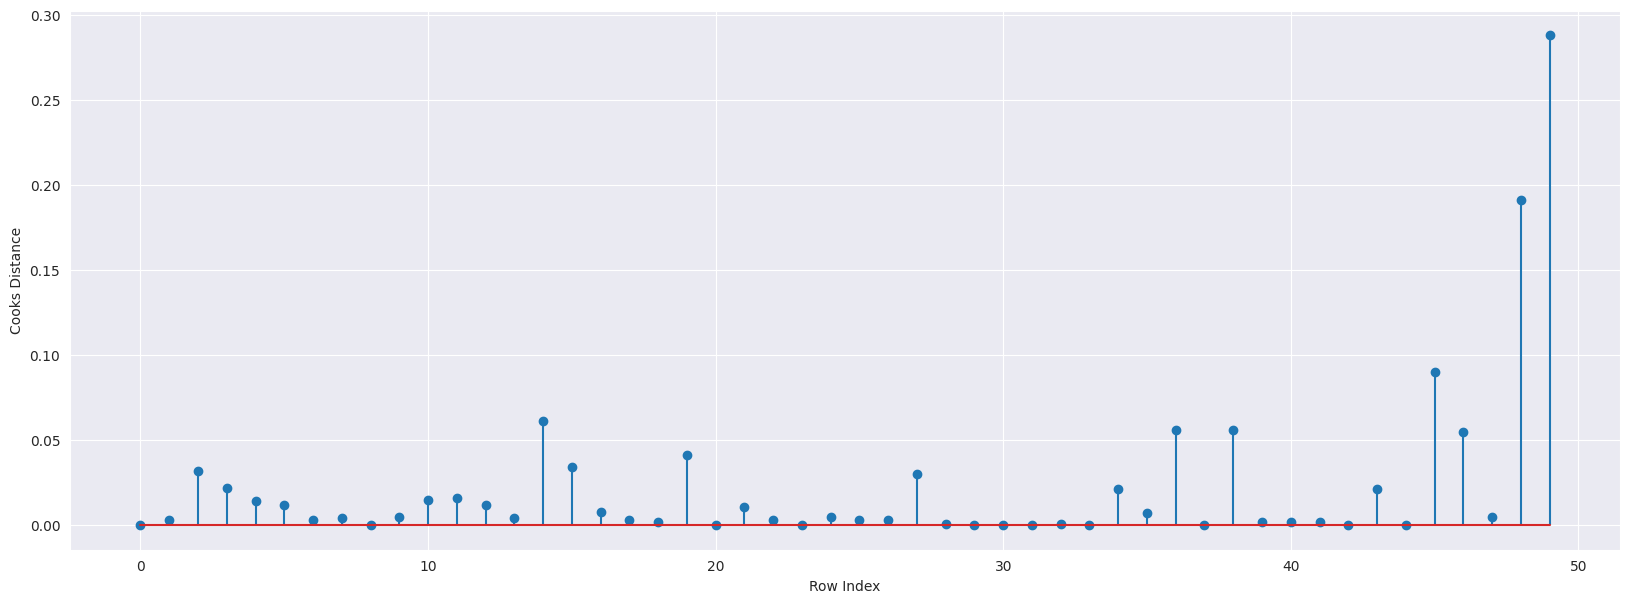

In [81]:
# Plot the influencers values using stem plot

plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [82]:
# index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

High Influence points

In [83]:
from statsmodels.graphics.regressionplots import influence_plot

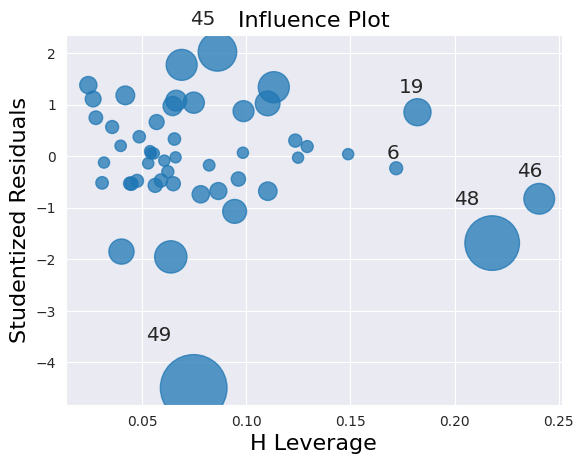

In [84]:
influence_plot(model)
plt.show()

In [85]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.54